# Imports

In [2]:
import orbitize
from orbitize import driver
import matplotlib.pyplot as plt
import multiprocessing as mp
import warnings
import numpy as np
import pandas as pd
from scipy import stats
warnings.filterwarnings("ignore")

import seaborn as sns
plt.rcParams['font.family'] = 'monospace'   # Fonts
plt.rcParams['font.monospace'] = 'DejaVu Sans Mono'
sns.set_context("talk")

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 16

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 

# plt.style.use('rose-pine-dawn')

# init MCMC

In [5]:
# MCMC parameters
num_walkers = 16
num_threads = mp.cpu_count()//4 # or a different number if you prefer
print(num_threads)
mtot = 5.5
mtot_err = 0.5
plx = 2.654763675820139 # or 2.41 from Menten 2007
plx_err = 0.042361263 # 0.03

my_driver = orbitize.driver.Driver('all-B2-B3.csv', # path to data file
                                  'OFTI', # name of algorithm for orbit-fitting
                                  1, # number of secondary bodies in system
                                  mtot, # total system mass [M_sun]
                                  plx, # total parallax of system [mas]
                                  mass_err=mtot_err, # mass error [M_sun]
                                  plx_err=plx_err, # parallax error [mas]
#                                   mcmc_kwargs={'num_walkers': num_walkers, 'num_threads': num_threads}
                                  )
epochs = my_driver.system.data_table['epoch']

2


# Run OFTI

In [7]:
# RUN MCMC
# burnpower = 1 # total: 4mil
# power = 1e1 # total: 4mil
# total_orbits = 5*power*num_walkers # number of steps x number of walkers (at lowest temperature)
# burn_steps = burnpower # steps to burn in per walker
# thin = 1 # only save every 2nd step

# my_driver.sampler.run_sampler(int(total_orbits), burn_steps=int(burn_steps), thin=int(thin))

orbits = my_driver.sampler.run_sampler(1000, num_samples=1000, num_cores=num_threads)

Process Process-15:
Process Process-14:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/envs/magao/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/magao/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/envs/magao/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/wbalmer/orbitize/orbitize/sampler.py", line 429, in _sampler_process
    accepted_orbits, lnlikes = self.reject(samples)
  File "/opt/anaconda3/envs/magao/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/wbalmer/orbitize/orbitize/sampler.py", line 429, in _sampler_process
    accepted_orbits, lnlikes = self.reject(samples)
  File "/Users/wbalmer/orbitize/orbitize/sampler.py", line 352, in reject
    lnp = self._logl(samples)
  

KeyboardInterrupt: 

<Figure size 1008x432 with 0 Axes>

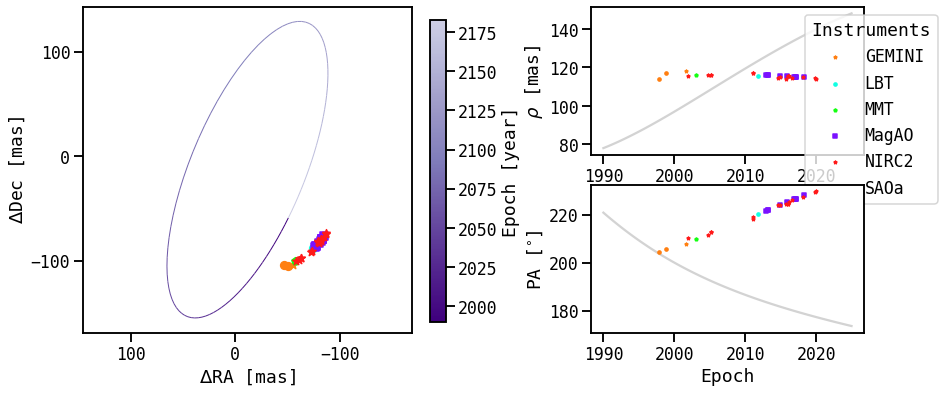

In [10]:
import seaborn as sns
from datetime import datetime
from astropy.time import Time
plt.rcParams['font.family'] = 'monospace'   # Fonts
plt.rcParams['font.monospace'] = 'DejaVu Sans Mono'
sns.set_context("talk")

starttime = Time(datetime.strptime('1990 January 1', '%Y %B %d')).to_value('mjd', 'long')

orb = my_driver.sampler.results.plot_orbits(
                                object_to_plot = 1, # Plot orbits for the first (and only, in this case) companion
                                num_orbits_to_plot= 1, # Will plot 50 randomly selected orbits of this companion
                                start_mjd=starttime, # Minimum MJD for colorbar (here we choose first data epoch)
                                show_colorbar = True,
                                rv_time_series = False,
                                plot_astrometry_insts=True
    )

In [ ]:
#MCMC PLOTS
corner_plot_fig = my_driver.sampler.results.plot_corner(smooth=1, bins=15) # Creates a corner plot and returns Figure object
corner_plot_fig.savefig('b2b3_corner_plot.png') # This is matplotlib.figure.Figure.savefig()

In [ ]:
sma_chains, ecc_chains = my_driver.sampler.examine_chains(param_list=['sma1','ecc1'], n_walkers=5)

In [4]:
# save result as hdf5
hdf5_filename='my_posterior.hdf5'
import os
# To avoid weird behaviours, delete saved file if it already exists from a previous run of this notebook
if os.path.isfile(hdf5_filename):
    os.remove(hdf5_filename)
my_driver.sampler.results.save_results(hdf5_filename)

# Load Prev

In [3]:
# load in saved hdf5 result
hdf5_filename = 'b2b3_orbitize_posterior.hdf5'
from orbitize import results
loaded_results = results.Results() # Create blank results object for loading
loaded_results.load_results(hdf5_filename)
# my_driver.sampler.results.load_results(hdf5_filename, append=True)

(-130.0, 30.0)

<Figure size 1008x432 with 0 Axes>

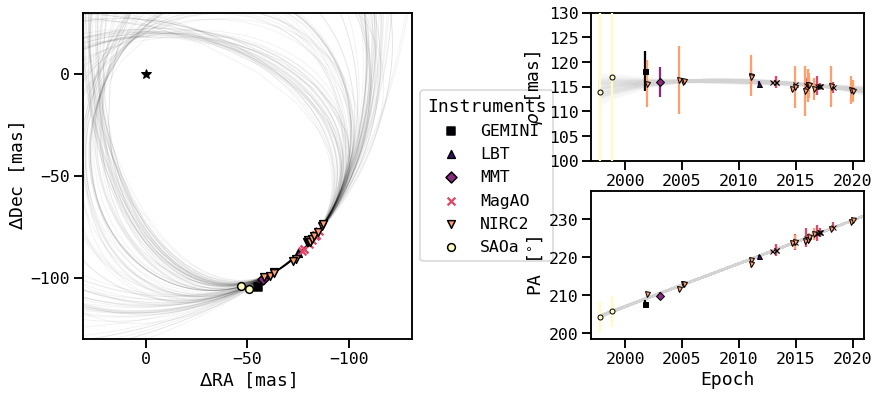

In [4]:
# nirc2 fit 
import seaborn as sns
from datetime import datetime
from astropy.time import Time
plt.rcParams['font.family'] = 'monospace'   # Fonts
plt.rcParams['font.monospace'] = 'DejaVu Sans Mono'
sns.set_context("talk")
epochs = my_driver.system.data_table['epoch']
orb_fig = loaded_results.plot_orbits(
    object_to_plot = 1, # Plot orbits for the first (and only, in this case) companion
    num_orbits_to_plot= 100, # Will plot 100 randomly selected orbits of this companion
    start_mjd=epochs[0], # Minimum MJD for colorbar (here we choose first data epoch)
    plot_astrometry=True,
    plot_astrometry_insts=True,
    show_colorbar=False,
    no_cbar=True,
    plot_astrometry_insts_leg=[(1,0.5),"center left"],

)

ax_orb, ax_sep, ax_pa  = orb_fig.axes #, ax_cbar

ax_sep.set_xlim(1997,2021)
ax_sep.set_ylim(100,130)
ax_pa.set_xlim(1997,2021)

# ax_pa.get_legend.remove()


ax_orb.plot(0,0,marker="*",color='black',markersize=10)
# ax_sep.legend()
# ax_pa.legend()

ax_orb.set_xlim(20,-120)
ax_orb.set_ylim(-130,30)

# orb_fig.savefig('b2b3_corrected.pdf', dpi=750) # This is matplotlib.figure.Figure.savefig()

In [5]:
from astropy.time import Time
post = loaded_results.post
results = pd.DataFrame(index=range(len(post[0,:])), columns=['med','err1','err2'])
for i in range(len(post[0,:])):    
    mode = np.median(post[:, i])#[0][0]
    percens = np.percentile(post[:, i], [16, 84])
    if i in [2,3,4]:
        from astropy.stats import circmean, circstd
        if i == 2:
            med = np.rad2deg(circmean(post[:,i]))
            errs = np.percentile(post[:,i], [16,84])
        else:
            post1 = post[post[:, i]<np.deg2rad(180)]
            post2 = post[post[:, i]>np.deg2rad(180)]
            med1, errs1 = np.rad2deg(circmean(post1[:, i])) % 360, np.rad2deg(circstd(post1[:, i])) % 360
            med2, errs2 = np.rad2deg(circmean(post2[:, i])) % 360, np.rad2deg(circstd(post2[:, i])) % 360
            med = (med1, med2)
            errs = (errs1, errs2)
        print(med)
    elif i == 5:
        import orbitize.basis
        tau_ref_epoch = 58849
        sma = post[:, 0]
        mtot = post[:, 7]
        period = np.sqrt(sma**3/mtot)
        tp = orbitize.basis.tau_to_tp(post[:, 5],tau_ref_epoch,period)
        mode = np.median(tp)#[0][0]
        percens = np.percentile(tp, [16, 84])
        mode = Time(mode, format='mjd').decimalyear
        percens = np.array([Time(x, format='mjd').decimalyear for x in percens])
        med, errs = round(mode,2), np.round(percens,2)-round(mode,2)
    else:
        med, errs = round(mode,2), np.round(percens,2)-round(mode,2)
    results.iloc[i]['med'] = med
    results.iloc[i]['err1'],results.iloc[i]['err2'] = errs
results.to_clipboard()

ImportError: cannot import name 'circstd' from 'astropy.stats' (/opt/anaconda3/envs/magao/lib/python3.9/site-packages/astropy/stats/__init__.py)

In [23]:
import pandas as pd
params = ['a$_{1}$ [au]','e$_{1}$','i$_{1}$ [$^\\circ$]', '$\\omega_{0}$ [$^\\circ$]', '$\\Omega_{0}$ [$^\\circ$]','$\\tau_{1}$','$\pi$ [mas]','M$_T$ [M$_{{\\odot}}$]']

postframe = pd.DataFrame(loaded_results.post[25000::1000,:], columns=params)
postframe.head()

,a$_{1}$ [au],e$_{1}$,i$_{1}$ [$^\circ$],$\omega_{0}$ [$^\circ$],$\Omega_{0}$ [$^\circ$],$\tau_{1}$,$\pi$ [mas],M$_T$ [M$_{{\odot}}$]
0,116.181822,0.773951,1.177146,4.162341,1.463453,0.372041,2.594047,5.723186
1,48.344364,0.725266,1.036177,4.667122,2.745073,0.753126,2.652100,6.008519
2,81.867597,0.734684,1.161677,4.374082,1.421856,0.644240,2.626205,6.243266
3,74.671264,0.677105,1.147148,1.949002,0.073193,0.391174,2.712092,4.821478
4,46.520101,0.710709,1.018732,4.656151,2.771076,0.757782,2.690868,5.373724


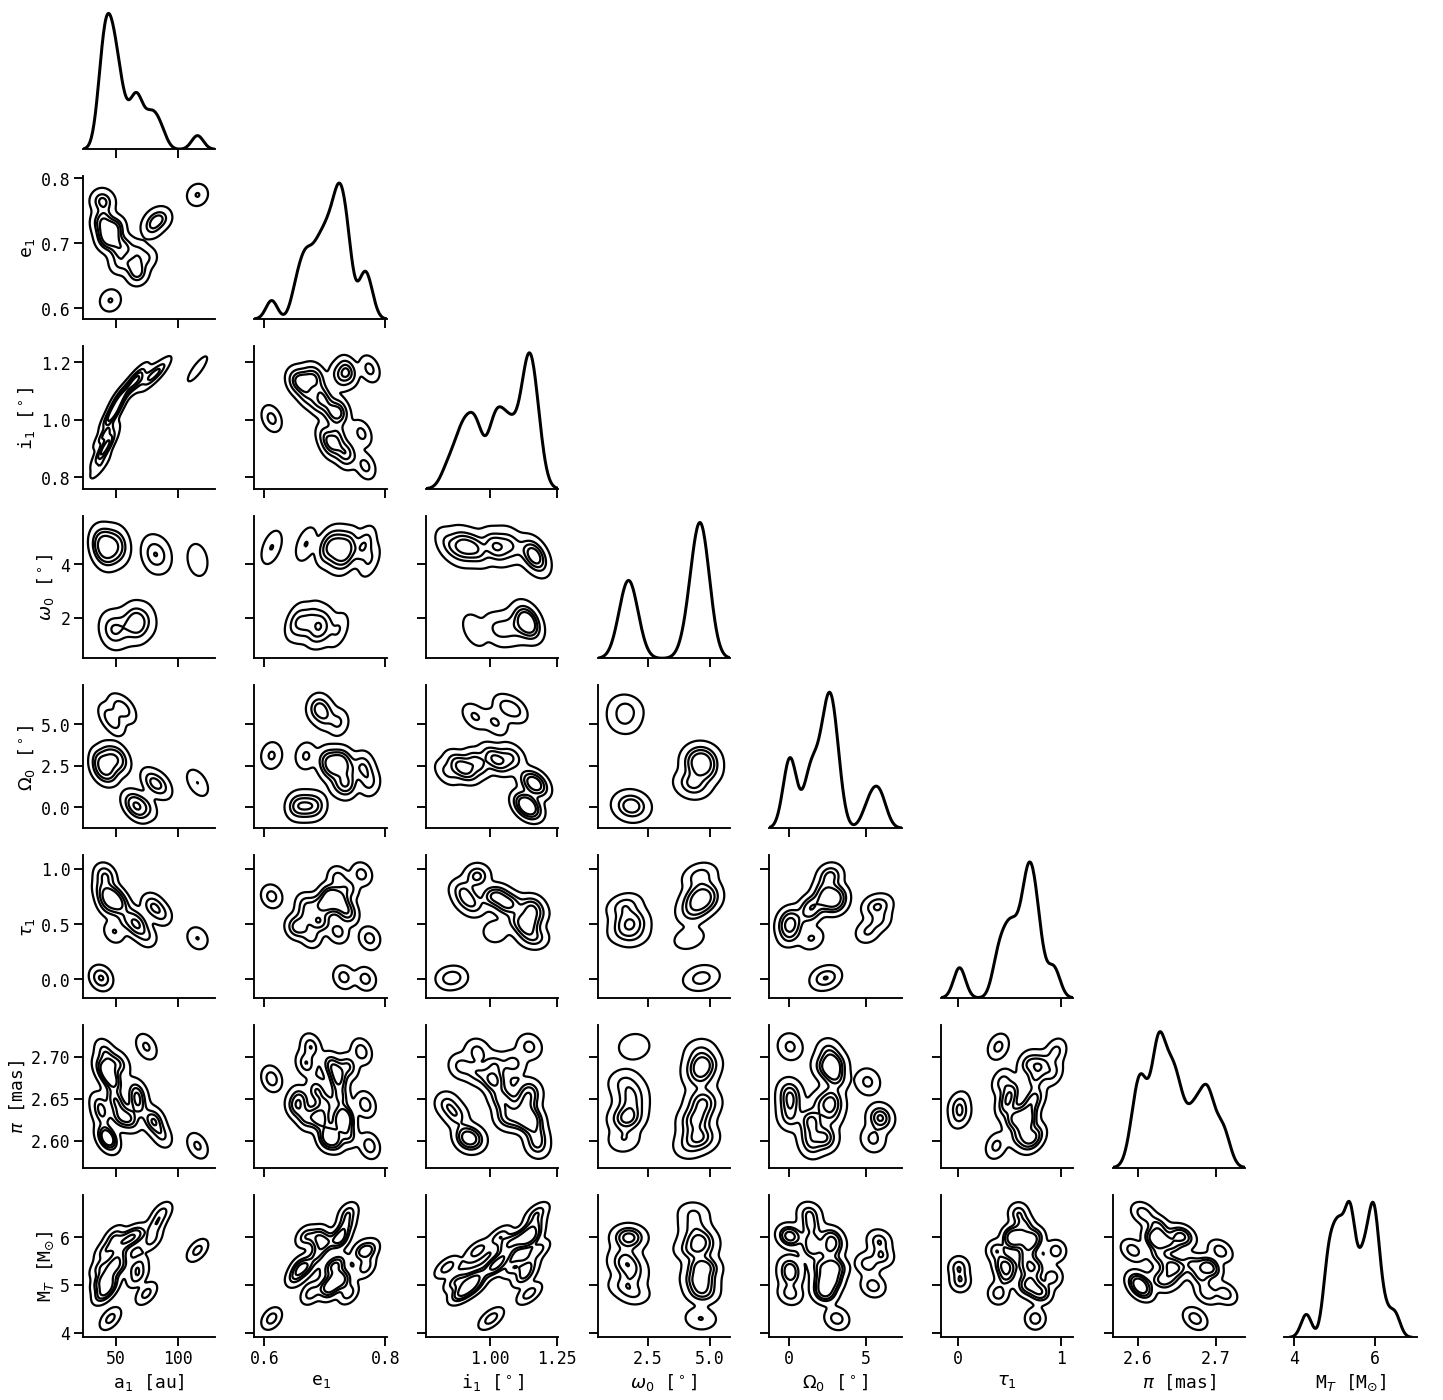

In [25]:
import seaborn as sns

plt.rcParams['font.family'] = 'monospace'   # Fonts
plt.rcParams['font.monospace'] = 'DejaVu Sans Mono'
sns.set_context("talk")

g = sns.PairGrid(postframe,
                 vars = params,
                 diag_sharey=False, corner=True,
                 )
g.map_lower(sns.kdeplot, bw=0.25, levels=5, lw=1, color='black')
g.map_diag(sns.kdeplot, lw=3, bw=0.25, color="black")
g.add_legend()
plt.savefig('b2b3_seaborn_corner_bw5.pdf',dpi=300)

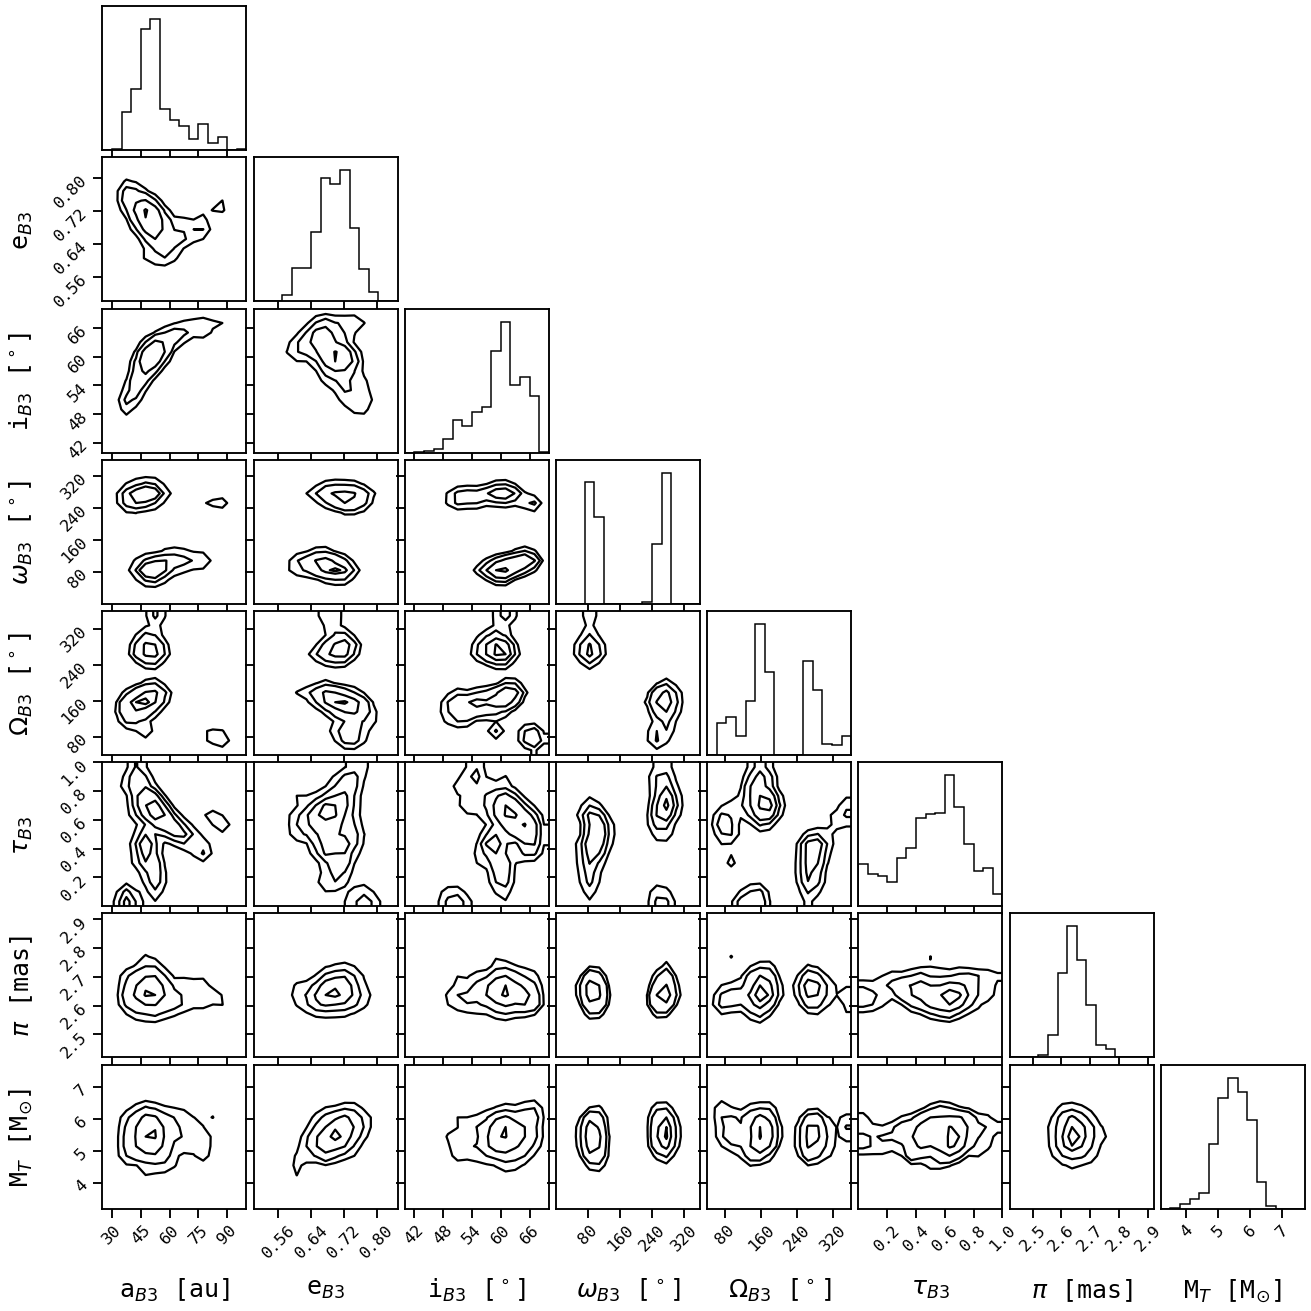

In [13]:
#MCMC PLOTS
range_values = [(25,100),(0.5,0.85),(40,70),(0, 360),(40,360),(0.,1.),(2.42,2.92),(3.2,7.7)]
corner_plot_fig = loaded_results.plot_corner(smooth=0.7, 
    bins=15,
    labels=['a$_{B3}$ [au]','e$_{B3}$','i$_{B3}$ [$^\circ$]', '$\\omega_{B3}$ [$^\circ$]', '$\\Omega_{B3}$ [$^\circ$]','$\\tau_{B3}$','$\\pi$ [mas]', 'M$_{T}$ [M$_{\\odot}$]'],
    range=range_values,
    labelpad=0.17,
    plot_datapoints=False,
    plot_density=False,
    label_kwargs={'fontsize':25},
) # Creates a corner plot and returns Figure object
corner_plot_fig.savefig('b2b3_corner.corner_plot.pdf', rasterize=False, dpi=750, bbox_inches='tight') # This is matplotlib.figure.Figure.savefig()

In [21]:
results = pd.read_csv(
    'visao_b2-b3 newerr.csv',
    header = 0,
    sep = ',',
    usecols = lambda x:x in ["Date", "med sep", "med PA", "med seperr", "med PAerr", "stdev sep", "stdev PA"],
    nrows = 9
)

for pa_i in range(len(results['med PA'])):
    pa = results['med PA'][pa_i]
    if pa < 90:
        results['med PA'][pa_i] += 180

In [22]:
import datetime
results['datetime'] = [datetime.datetime.strptime(x, '%Y-%m-%d') for x in results['Date']]
results['epoch'] = [(x-results.datetime[0]).days for x in results.datetime]
from astropy.time import Time
results['MJD'] = [Time(x, format='datetime').mjd for x in results['datetime']]

outtable = pd.DataFrame()
outtable['epoch'] = results['MJD']
outtable['object'] = np.zeros(len(results))+1
outtable['sep'] = results['med sep']
outtable['sep_err'] = results['med seperr']
outtable['pa'] = results['med PA']
outtable['pa_err'] = results['med PAerr']
outtable.to_csv('visao-b2b3-orbitizelike.csv', index=False)
# outtable.head()

In [23]:
visao_pa_default = -0.59
visao_pa_default_err = 0.3
outtable['pa_default'] = outtable['pa']-0.59
outtable['sep_default'] = outtable['sep']*7.8513
outtable['pa_err_default'] = np.sqrt(((outtable['pa_err'])**2)+((0.3)**2))
outtable['sep_err_default'] = outtable['sep_default']*np.sqrt(((outtable['sep_err']/outtable['sep'])**2)+((0.02/7.8513)**2))
# outtable.head()

# uncorrected plots

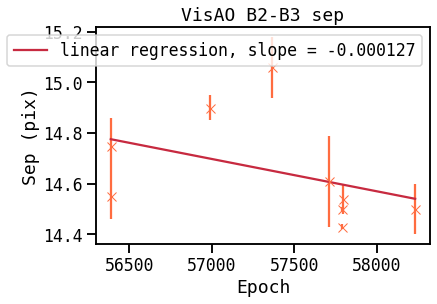

In [24]:
# uncorrected sep in pixels plot
slope, intercept, r_value, p_value, std_err = stats.linregress(outtable['epoch'], outtable['sep'])
plt.errorbar(outtable['epoch'], outtable['sep'], yerr=outtable['sep_err'], ls='none', marker='x', color='#ff6c40')
label = "linear regression, slope = "+str(round(slope,6))
plt.plot(outtable['epoch'], intercept + slope*outtable['epoch'], color='#c72a40', label=label)
plt.legend()
# plt.xlim(-500, 6700)
plt.title('VisAO B2-B3 sep')
plt.xlabel('Epoch')
plt.ylabel('Sep (pix)')
plt.savefig('visao_sep_pix.png', dpi=300)

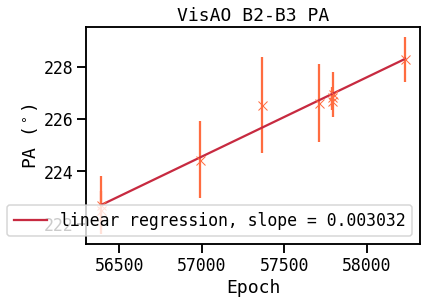

In [25]:
# uncorrected PA 
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(outtable['epoch'], outtable['pa'])
plt.errorbar(outtable['epoch'], outtable['pa'], yerr=outtable['pa_err'], ls='none', marker='x', color='#ff6c40')
label = "linear regression, slope = "+str(round(slope,6))
plt.plot(outtable['epoch'], intercept + slope*outtable['epoch'], color='#c72a40', label=label)
plt.legend(loc='lower right')
#plt.xlim(-500, 6700)
plt.title('VisAO B2-B3 PA')
plt.xlabel('Epoch')
plt.ylabel(r'PA ($^\circ$)')
plt.savefig('visao_pa.png', dpi=300)

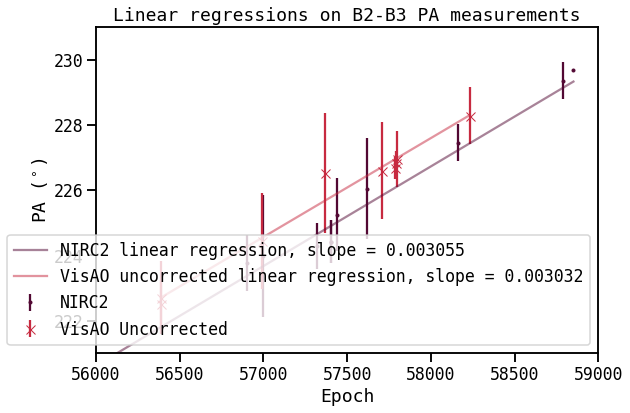

In [26]:
# compare to NIRC2
nircast = pd.read_csv('B2-B3-orbitizetab.csv')

from astropy.time import Time
epochs_yr = Time(outtable['epoch'], format='mjd').decimalyear
epochs_yr_nirc = Time(nircast['epoch'], format='mjd').decimalyear

plt.figure(figsize=(9,6))
slope, intercept, r_value, p_value, std_err = stats.linregress(nircast['epoch'], nircast['pa'])
plt.errorbar(nircast['epoch'], nircast['pa'], yerr=nircast['pa_err'], ls='none', marker='o', markersize=3, label='NIRC2', color='#520833')
label = "NIRC2 linear regression, slope = "+str(round(slope,6))
plt.plot(nircast['epoch'], intercept + slope*nircast['epoch'], color='#520833', label=label, alpha=0.5)

slope, intercept, r_value, p_value, std_err = stats.linregress(outtable['epoch'], outtable['pa'])
plt.errorbar(outtable['epoch'], outtable['pa'], yerr=outtable['pa_err'], ls='none', marker='x', label='VisAO Uncorrected', color='#c72a40')
label = "VisAO uncorrected linear regression, slope = "+str(round(slope,6))
plt.plot(outtable['epoch'], intercept + slope*outtable['epoch'], color='#c72a40', label=label, alpha=0.5)

plt.legend(loc='lower right')
plt.xlim(56000, 59000)
plt.ylim(221,231)
plt.title('Linear regressions on B2-B3 PA measurements')
plt.xlabel('Epoch')
plt.ylabel(r'PA ($^\circ$)')
plt.savefig('visao_pa_compare.png', dpi=300)

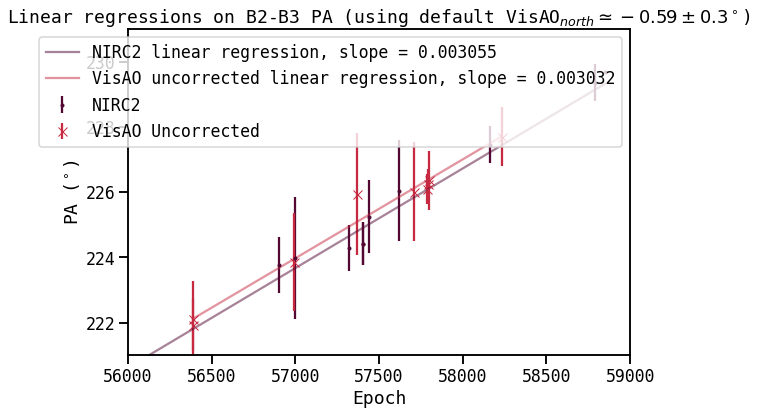

In [27]:
# compare if using default VisAO_north
nircast = pd.read_csv('B2-B3-orbitizetab.csv')

plt.figure(figsize=(9,6))
slope, intercept, r_value, p_value, std_err = stats.linregress(nircast['epoch'], nircast['pa'])
plt.errorbar(nircast['epoch'], nircast['pa'], yerr=nircast['pa_err'], ls='none', marker='o', markersize=3, label='NIRC2', color='#520833')
label = "NIRC2 linear regression, slope = "+str(round(slope,6))
plt.plot(nircast['epoch'], intercept + slope*nircast['epoch'], color='#520833', label=label, alpha=0.5)

slope, intercept, r_value, p_value, std_err = stats.linregress(outtable['epoch'], outtable['pa_default'])
plt.errorbar(outtable['epoch'], outtable['pa_default'], yerr=outtable['pa_err_default'], ls='none', marker='x', label='VisAO Uncorrected', color='#c72a40')
label = "VisAO uncorrected linear regression, slope = "+str(round(slope,6))
plt.plot(outtable['epoch'], intercept + slope*outtable['epoch'], color='#c72a40', label=label, alpha=0.5)

plt.legend()
plt.xlim(56000, 59000)
plt.ylim(221,231)
plt.title(r'Linear regressions on B2-B3 PA (using default VisAO$_{north}\simeq-0.59\pm0.3^\circ$)')
plt.xlabel('Epoch')
plt.ylabel(r'PA ($^\circ$)')
plt.savefig('visao_pa_compare_default.png', dpi=300)

In [28]:
# orbitize positions for magao epochs

# semimajor axis 1, eccentricity 1, inclination 1,
# argument of periastron 1, position angle of nodes 1,
# epoch of periastron passage 1
data = loaded_results.post
JDs = outtable['epoch']
sma = data[:, 0]
ecc = data[:, 1]
inc = data[:, 2]
aop = data[:, 3]
pan = data[:, 4]
tau = data[:, 5]
plxs = data[:, 6]
mtots = data[:, 7]
ra, dec, vz = orbitize.kepler.calc_orbit(JDs, sma, ecc, inc, aop, pan, tau, plxs, mtots, tau_ref_epoch=loaded_results.tau_ref_epoch)

In [29]:
# center of orbit distribution
measure_of_tendy = 'mode'

from scipy import stats
seps, pas = orbitize.system.radec2seppa(ra, dec)

exp_seps = np.zeros((seps.shape[0]))
exp_sep_errs = np.zeros((seps.shape[0]))
exp_pas = np.zeros((seps.shape[0]))
exp_pa_errs = np.zeros((seps.shape[0]))
for epoch in range(len(exp_seps)):
    if measure_of_tendy == 'mode':
        sep_ep = stats.mode(seps[epoch])[0][0]
        pa_ep = stats.mode(pas[epoch])[0][0]
    elif measure_of_tendy == 'median':
        sep_ep = np.median(seps[epoch])
        pa_ep = np.median(pas[epoch])
    elif measure_of_tendy == 'mean':
        sep_ep = np.average(seps[epoch])
        pa_ep = np.average(pas[epoch])
    
    sep_ep_Err = np.std(seps[epoch])
    exp_seps[epoch] = sep_ep
    exp_sep_errs[epoch] = sep_ep_Err
    exp_pas[epoch] = pa_ep
    pa_ep_Err = np.std(pas[epoch])
    exp_pa_errs[epoch] = pa_ep_Err

In [30]:
# create dataframes for orbitize positions on magao epochs
pa = outtable['pa']; pa_err = outtable['pa_err']

visP = pa
visPe = pa_err

kekS = exp_seps
kekSe = exp_sep_errs
kekP = exp_pas
kekPe = exp_pa_errs

kekDF = pd.DataFrame(columns=['epoch', 'sep', 'seperr', 'pa', 'paerr'])
kekDF['epoch'] = epochs_yr
kekDF['sep'] = kekS
kekDF['seperr'] = kekSe
kekDF['pa'] = kekP
kekDF['paerr'] = kekPe
kekDF.head()

,epoch,sep,seperr,pa,paerr
0,2013.260274,115.807473,0.181975,221.989606,0.019519
1,2013.263014,115.807177,0.181898,221.992695,0.019518
2,2014.909589,115.587851,0.125495,223.852762,0.018545
3,2015.942466,115.402578,0.087566,225.023726,0.017272
4,2016.877049,115.197268,0.076589,226.089586,0.015353


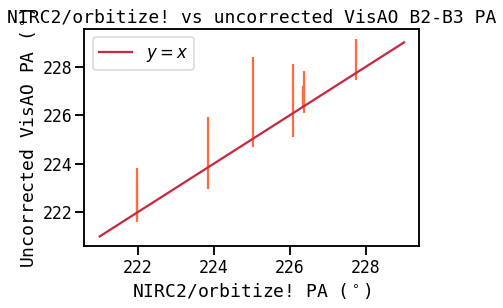

In [31]:
plt.errorbar(x=kekP, y=visP, xerr=kekPe, yerr=visPe, ls='none', color='#ff6c40')
plt.plot([221,229],[221,229], label=r'$y=x$', color='#c72a40')
plt.title('NIRC2/orbitize! vs uncorrected VisAO B2-B3 PA')
plt.legend()
plt.xlabel(r'NIRC2/orbitize! PA ($^\circ$)')
plt.ylabel(r'Uncorrected VisAO PA ($^\circ$)')
plt.savefig('visao_pa_compare_uncorrected.png', dpi=300)

# minimize residuals to orbitize fit

0.648 0.15770615568795274


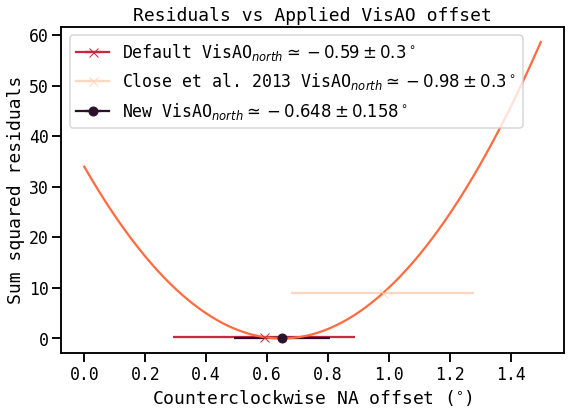

In [32]:
import numpy as np
from scipy.odr import *
residuals = []
for i in np.arange(0.0, 1.5, 0.001):
    visP_new = visP-i
    residP = visP_new - kekP
    Perr = np.sqrt((visPe)**2+(kekPe)**2)
    # sum squared residuals
    sumsquare = np.sum(residP)**2    
    # error on i
    from statsmodels.stats.weightstats import DescrStatsW
    wstats = DescrStatsW(residP, 1/((Perr)**2), ddof=0)
    best_fit_err = wstats.std

    residuals.append((i, sumsquare, best_fit_err))    
        
pa_resid_arr = np.array(residuals)
best_pa_off = pa_resid_arr[pa_resid_arr[:,1] == pa_resid_arr[:,1].min()]
print(best_pa_off[0][0], best_pa_off[0][2])
pa_resid_arr[:,0] = [round(x, 3) for x in pa_resid_arr[:,0]]
orig_pa_off = pa_resid_arr[pa_resid_arr[:,0] == 0.590]
close_pa_off = pa_resid_arr[pa_resid_arr[:,0] == 0.980]
plt.figure(figsize=(9,6))
plt.plot(pa_resid_arr[:,0], pa_resid_arr[:,1], color='#ff6c40')
plt.errorbar(orig_pa_off[:,0][0], orig_pa_off[:,1][0], xerr=visao_pa_default_err, marker='x', label='Default VisAO$_{north}\simeq-0.59\pm0.3^\circ$', color='#c72a40')
# add in Close 2013 too (?)
plt.errorbar(close_pa_off[:,0][0], close_pa_off[:,1][0], xerr=0.3, marker='x', label='Close et al. 2013 VisAO$_{north}\simeq-0.98\pm0.3^\circ$', color='#ffd6bf')
newlabel = 'New VisAO$_{north}\simeq-'+str(round(best_pa_off[0][0],3))+'\pm'+str(round(best_pa_off[0][2],3))+'^\circ$'
plt.errorbar(best_pa_off[:,0][0], best_pa_off[:,1][0], xerr=best_fit_err, marker='o', label=newlabel, color='#2c112b')
plt.title('Residuals vs Applied VisAO offset')#, fontsize=22)
plt.legend()
plt.xlabel(r'Counterclockwise NA offset ($^{\circ}$)')#, fontsize=18)
plt.ylabel('Sum squared residuals')#, fontsize=18)
plt.savefig('NAoff_resids.png', dpi=300)
# plt.vlines(best_pa_off[:,0], ymin=1.5, ymax=2.5)

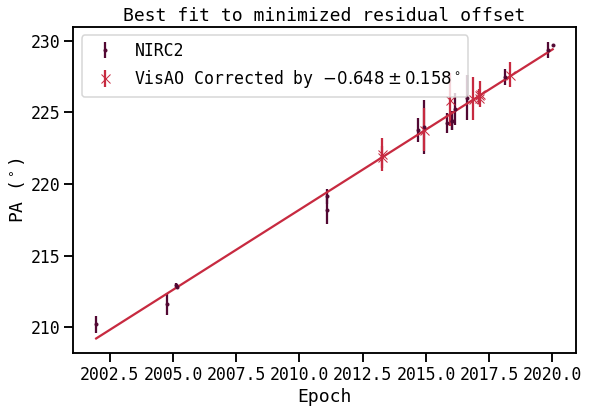

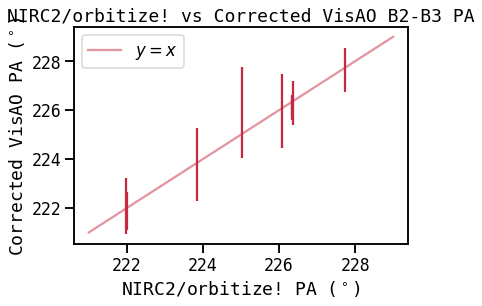

In [33]:
for i in [best_pa_off[0][0]]:
    visP_new = visP-i
    kekP_orig = nircast['pa']
    kekPe_orig = nircast['pa_err']
    allP = np.append(visP_new, kekP_orig)
    allerr = np.append(visPe, kekPe_orig)
    allyr = np.append(epochs_yr, epochs_yr_nirc)
    
    # linear regression accounting for errorbars on y
    x = allyr
    y = allP
    y_err = allerr
    
    # Define a function to fit the data with.
    def lin_func(p, x):
        m, b = p
        return m*x + b

    # Create a model for fitting.
    lin_model = Model(lin_func)

    # Create a RealData object using our initiated data from above.
    data = RealData(x, y, sy=y_err)

    # Set up ODR with the model and data.
    odr = ODR(data, lin_model, beta0=[0., 1.])

    # Run the regression.
    out = odr.run()
        
    x_fit = np.linspace(x.min(), x.max(), 1000)
    y_fit = lin_func(out.beta, x_fit)
    points_y_fit = lin_func(out.beta, epochs_yr)
    visresid = visP_new-points_y_fit
    from statsmodels.stats.weightstats import DescrStatsW
    wstats = DescrStatsW(visresid, 1/visPe, ddof=0)
    best_fit_err = wstats.std
#         print(str(0.497), best_fit_err)
    visPe_new = np.sqrt((visPe)**2+(best_fit_err)**2)
    plt.figure(figsize=(9,6))
    plt.errorbar(epochs_yr_nirc, nircast['pa'], yerr=nircast['pa_err'], linestyle='None', marker='o', color='#520833', markersize=3, label='NIRC2')
    label = r'VisAO Corrected by $-'+str(round(best_pa_off[0][0],3))+'\pm'+str(round(best_pa_off[0][2],3))+'^\circ$'
    plt.errorbar(epochs_yr, visP_new, yerr=visPe_new, linestyle='None', marker='x', color='#c72a40', label=label)
    plt.plot(x_fit, y_fit, color='#c72a40')
    plt.title('Best fit to minimized residual offset')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel(r'PA ($^\circ$)')
    plt.savefig('quick_min_resid_fit.png', dpi=300)
    plt.show()
    # 
    plt.figure()
    plt.errorbar(x=kekP, y=visP_new, xerr=kekPe, yerr=visPe_new, ls='none', color='#c72a40')
    plt.plot([221,229],[221,229], label=r'$y=x$', color='#c72a40', alpha=0.5)
    plt.title('NIRC2/orbitize! vs Corrected VisAO B2-B3 PA')
    plt.legend()
    plt.xlabel(r'NIRC2/orbitize! PA ($^\circ$)')
    plt.ylabel(r'Corrected VisAO PA ($^\circ$)')
    plt.savefig('visao_pa_compare_corrected.png', dpi=300)

In [34]:
# for mult/div fractional uncertainties add in quad
# for add/sub uncertainties add in quad
# least squares min on each point 
outtable['platescale'] = kekS/outtable['sep']
outtable['platescale_err'] = outtable['platescale']*np.sqrt(((outtable['sep_err']/outtable['sep'])**2)+((kekSe/kekS)**2))
outtable['plateweight'] = 1/(outtable['platescale_err']**2)

outtable['pa_offset'] = outtable['pa']-kekP
outtable['pa_offset_err'] = np.sqrt(((outtable['pa_err'])**2)+((kekPe)**2))

In [35]:
outtable['pa_expected'] = outtable['pa']-outtable['pa_offset']
outtable['sep_expected'] = outtable['sep']*outtable['platescale']
outtable['pa_err_expected'] = np.sqrt(((outtable['pa_err'])**2)+((outtable['pa_offset_err'])**2))
outtable['sep_err_expected'] = outtable['sep_expected']*np.sqrt(((outtable['sep_err']/outtable['sep'])**2)+((outtable['platescale_err']/outtable['platescale'])**2))
# outtable.to_clipboard()

In [36]:
outtable2 = pd.DataFrame()
outtable2['epoch'] = outtable['epoch']
outtable2['sep'] = outtable['sep_expected']
outtable2['seperr'] = outtable['sep_err_expected']
outtable2['pa'] = outtable['pa_expected']
outtable2['paerr'] = outtable['pa_err_expected']
outtable2.to_clipboard()

# calc new default

In [37]:
outtable['pa_newdef'] = outtable['pa']-best_pa_off[:,0][0]

newplate = np.average(outtable['platescale'], weights=outtable['plateweight'])
newplate_err = np.std(outtable['platescale'])#1/np.sqrt(np.sum(outtable['plateweight']))
print('new platescale is: '+str(newplate)+'+/-'+str(newplate_err))
newpa = -best_pa_off[0][0]
newpaerr = round(best_pa_off[0][2],3)
print('new pa-off is: '+str(newpa)+'+/-'+str(newpaerr))

outtable['sep_newdef'] = outtable['sep']*newplate
outtable['pa_err_newdef'] = np.sqrt(((outtable['pa_err'])**2)+((best_fit_err)**2))
outtable['sep_err_newdef'] = outtable['sep_newdef']*np.sqrt(((outtable['sep_err']/outtable['sep'])**2)+((newplate_err/newplate)**2))

new platescale is: 7.947834308470478+/-0.09747480128650857
new pa-off is: -0.648+/-0.158


# Orbitize Plots

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1008x432 with 0 Axes>

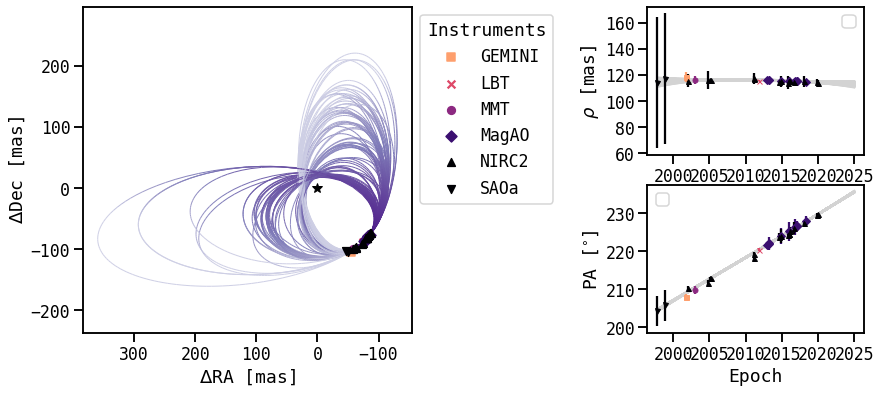

In [8]:
# nirc2 fit 
import seaborn as sns
from datetime import datetime
from astropy.time import Time
plt.rcParams['font.family'] = 'monospace'   # Fonts
plt.rcParams['font.monospace'] = 'DejaVu Sans Mono'
sns.set_context("talk")
epochs = my_driver.system.data_table['epoch']
orb_fig = loaded_results.plot_orbits(
    object_to_plot = 1, # Plot orbits for the first (and only, in this case) companion
    num_orbits_to_plot= 100, # Will plot 100 randomly selected orbits of this companion
    start_mjd=epochs[0], # Minimum MJD for colorbar (here we choose first data epoch)
    plot_astrometry=True,
    plot_astrometry_insts=True,
    show_colorbar=False,
    plot_astrometry_insts_leg=[(1,1),"upper left"]
)

ax_orb, ax_sep, ax_pa  = orb_fig.axes #, ax_cbar

# grab data from Driver object
# data_tab = my_driver.system.data_table

# add expected pos to sep panel
# ax_sep.errorbar(
#     epochs_yr_nirc, nircast['sep'], nircast['sep_err'],
#     color='purple', linestyle='', fmt='^', zorder=3, label='NIRC2'
# )

# # add expected pos to PA panel
# ax_pa.errorbar(
#     epochs_yr_nirc, nircast['pa'], nircast['pa_err'],
#     color='purple', linestyle='', fmt='^', zorder=3, label='NIRC2'
# )

# # add expected pos to RA+dec panel
# nirc2ra, nirc2dec = orbitize.system.seppa2radec(nircast['sep'], nircast['pa'])
# ax_orb.errorbar(
#     nirc2ra, nirc2dec, fmt='*', zorder=3, color='cyan', linestyle='', markersize=3
# )

ax_orb.plot(0,0,marker="*",color='black',markersize=10)
ax_sep.legend()
ax_pa.legend()

# ax_orb.set_xlim(200,-200)
# ax_orb.set_ylim(-200,200)

# orb_fig.savefig('b2b3_orbit_plot.png', dpi=300) # This is matplotlib.figure.Figure.savefig()

<Figure size 1008x432 with 0 Axes>

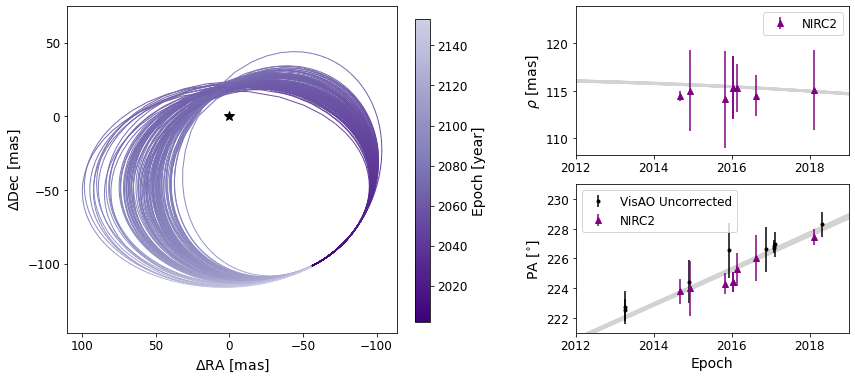

In [31]:
# uncorrected PA
epochs = my_driver.system.data_table['epoch']

orb_fig = loaded_results.plot_orbits(
    object_to_plot = 1, # Plot orbits for the first (and only, in this case) companion
    num_orbits_to_plot= 100, # Will plot 100 randomly selected orbits of this companion
    start_mjd=epochs[0], # Minimum MJD for colorbar (here we choose first data epoch)
    plot_astrometry=False,
    data = my_driver.system.data_table
)

ax_orb, ax_sep, ax_pa, ax_cbar  = orb_fig.axes



# grab data from Driver object
data_tab = my_driver.system.data_table

# # add data to sep panel
# ax_sep.errorbar(
#     epochs_yr, visS, visSe,
#     color='black', linestyle='', fmt='o', zorder=3, label='VisAO Uncorrected', markersize=3
# )

# add data to PA panel
ax_pa.errorbar(
    epochs_yr, visP, visPe,
    color='black', linestyle='', fmt='o', zorder=3, label='VisAO Uncorrected', markersize=3
)

# add expected pos to sep panel
ax_sep.errorbar(
    epochs_yr_nirc, nircast['sep'], nircast['sep_err'],
    color='purple', linestyle='', fmt='^', zorder=3, label='NIRC2'
)

# add expected pos to PA panel
ax_pa.errorbar(
    epochs_yr_nirc, nircast['pa'], nircast['pa_err'],
    color='purple', linestyle='', fmt='^', zorder=3, label='NIRC2'
)

ax_orb.plot(0,0,marker="*",color='black',markersize=10)
ax_sep.legend()
ax_pa.legend()

# zoom in a bit
ax_sep.set_xlim(2012,2019)
ax_pa.set_xlim(2012,2019)
# ax_sep.set_ylim(113.5,118)
ax_pa.set_ylim(221,231)

# Save just the portion _inside_ the second axis's boundaries
extent = ax_pa.get_window_extent().transformed(orb_fig.dpi_scale_trans.inverted())
# Pad the saved area by 10% in the x-direction and 20% in the y-direction
orb_fig.savefig('pa_figure_expanded.png', bbox_inches=extent.expanded(1.4, 1.5), dpi=300)

# orb_fig.savefig('b2b3_uncorrected.png', dpi=300) # This is matplotlib.figure.Figure.savefig()

NameError: name 'outtable' is not defined

<Figure size 1008x432 with 0 Axes>

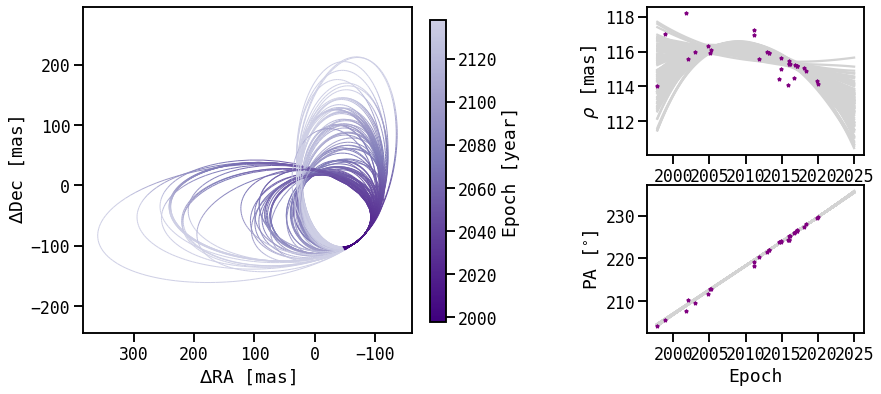

In [11]:
# visao default
orb_fig = loaded_results.plot_orbits(
    object_to_plot = 1, # Plot orbits for the first (and only, in this case) companion
    num_orbits_to_plot= 100, # Will plot 100 randomly selected orbits of this companion
    start_mjd=epochs[0], # Minimum MJD for colorbar (here we choose first data epoch)
    plot_astrometry=False,
#     data = my_driver.system.data_table
)

ax_orb, ax_sep, ax_pa, ax_cbar  = orb_fig.axes

from astropy.time import Time

# grab data from Driver object
data_tab = my_driver.system.data_table

epochs_yr = Time(epochs, format='mjd').decimalyear

# add data to sep panel
ax_sep.errorbar(
    epochs_yr, outtable['sep_default'], outtable['sep_err_default'],
    color='black', linestyle='', fmt='o', markersize=3, zorder=3, label='VisAO default pixscale'
)

# add data to PA panel
ax_pa.errorbar(
    epochs_yr, outtable['pa_default'], outtable['pa_err_default'],
    color='black', linestyle='', fmt='o', markersize=3, zorder=3, label='VisAO Default offset'
)

# add uncorrected data to PA panel
ax_pa.errorbar(
    epochs_yr, visP, visPe,
    color='grey', linestyle='', fmt='o', zorder=3, label='VisAO Uncorrected', markersize=3
)

# add expected pos to sep panel
ax_sep.errorbar(
    epochs_yr_nirc, nircast['sep'], nircast['sep_err'],
    color='purple', linestyle='', fmt='^', zorder=3, label='NIRC2'
)

# add expected pos to PA panel
ax_pa.errorbar(
    epochs_yr_nirc, nircast['pa'], nircast['pa_err'],
    color='purple', linestyle='', fmt='^', zorder=3, label='NIRC2'
)

ax_orb.plot(0,0,marker="*",color='black',markersize=10)
ax_sep.legend(loc='upper left')
ax_pa.legend()

# zoom in a bit
ax_sep.set_xlim(2012,2019)
ax_pa.set_xlim(2012,2019)
# ax_sep.set_ylim(113.5,118)
ax_pa.set_ylim(220,229)

# Save just the portion _inside_ the second axis's boundaries
extent = ax_pa.get_window_extent().transformed(orb_fig.dpi_scale_trans.inverted())
# Pad the saved area by 10% in the x-direction and 20% in the y-direction
orb_fig.savefig('b2b3_visao_default.png', bbox_inches=extent.expanded(1.4, 5), dpi=300)

# orb_fig.savefig('b2b3_visao_default.png', dpi=300) # This is matplotlib.figure.Figure.savefig()

<Figure size 1008x432 with 0 Axes>

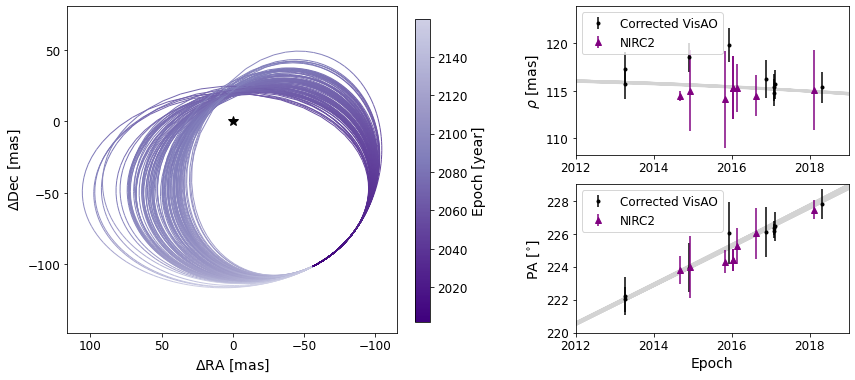

In [33]:
# visao new default
epochs = my_driver.system.data_table['epoch']

orb_fig = loaded_results.plot_orbits(
    object_to_plot = 1, # Plot orbits for the first (and only, in this case) companion
    num_orbits_to_plot= 100, # Will plot 100 randomly selected orbits of this companion
    start_mjd=epochs[0], # Minimum MJD for colorbar (here we choose first data epoch)
    plot_astrometry=False,
    data = my_driver.system.data_table
)

ax_orb, ax_sep, ax_pa, ax_cbar  = orb_fig.axes

from astropy.time import Time

# grab data from Driver object
data_tab = my_driver.system.data_table

epochs_yr = Time(outtable['epoch'], format='mjd').decimalyear

# add data to sep panel
ax_sep.errorbar(
    epochs_yr, outtable['sep_newdef'], outtable['sep_err_newdef'],
    color='black', linestyle='', fmt='o', markersize=3, zorder=3, label='Corrected VisAO'
)

# add data to PA panel
ax_pa.errorbar(
    epochs_yr, outtable['pa_newdef'], outtable['pa_err_newdef'],
    color='black', linestyle='', fmt='o', markersize=3, zorder=3, label='Corrected VisAO'
)

# # add uncorrected data to PA panel
# ax_pa.errorbar(
#     epochs_yr, visP, visPe,
#     color='grey', linestyle='', fmt='o', zorder=3, label='VisAO Uncorrected', markersize=3
# )

# add expected pos to sep panel
ax_sep.errorbar(
    epochs_yr_nirc, nircast['sep'], nircast['sep_err'],
    color='purple', linestyle='', fmt='^', zorder=3, label='NIRC2'
)

# add expected pos to PA panel
ax_pa.errorbar(
    epochs_yr_nirc, nircast['pa'], nircast['pa_err'],
    color='purple', linestyle='', fmt='^', zorder=3, label='NIRC2'
)

ax_orb.plot(0,0,marker="*",color='black',markersize=10)
ax_sep.legend(loc='upper left')
ax_pa.legend()

# zoom in a bit
ax_sep.set_xlim(2012,2019)
ax_pa.set_xlim(2012,2019)
# ax_sep.set_ylim(113.5,118)
ax_pa.set_ylim(220,229)

# Save just the portion _inside_ the second axis's boundaries
extent = ax_pa.get_window_extent().transformed(orb_fig.dpi_scale_trans.inverted())
# Pad the saved area by 10% in the x-direction and 20% in the y-direction
orb_fig.savefig('b2b3_visao_corrected.png', bbox_inches=extent.expanded(1.4, 5), dpi=300)

# orb_fig.savefig('b2b3_corrected.png', dpi=300) # This is matplotlib.figure.Figure.savefig()


# Platescale calc and figures

In [39]:
# newpa = 0.41
# newpa_err = 0.11
# newplate = 7.91
# newplate_err = 0.11
# outtable['pa_newdef'] = outtable['pa']-newpa
# outtable['sep_newdef'] = outtable['sep']*newplate
# outtable['pa_err_newdef'] = np.sqrt(((outtable['pa_err'])**2)+((newpa_err)**2))
# outtable['sep_err_newdef'] = outtable['sep_newdef']*np.sqrt(((outtable['sep_err']/outtable['sep'])**2)+((newplate_err/newplate)**2))

In [38]:
import seaborn as sns
plt.rcParams['font.family'] = 'monospace'   # Fonts
plt.rcParams['font.monospace'] = 'DejaVu Sans Mono'
sns.set_context("talk")

In [39]:
indivresults = pd.read_csv('VisAO B2-B3 HPF Final.csv')
indivresults.head()

,sep,seperr,PA,PAerr,date,filter
0,14.897,0.222,42.298,2.419,2013-04-06,Ys
1,14.755,0.246,43.188,2.586,2013-04-06,Ys
2,14.693,0.192,42.868,2.049,2013-04-06,Ys
3,14.653,0.239,42.535,2.073,2013-04-06,zprime
4,14.558,0.254,42.263,2.364,2013-04-07,rprime


In [40]:
haindiv = indivresults[indivresults['filter']=='SDI-H-alpha']
zindiv = indivresults[indivresults['filter']=='zprime']
yindiv = indivresults[indivresults['filter']=='Ys']
iindiv = indivresults[indivresults['filter']=='iprime']
rindiv = indivresults[indivresults['filter']=='rprime']

In [41]:
timedict = {'2013-04-06':56388,
'2013-04-07':56389,
'2014-11-29':56990,
'2015-12-11':57367,
'2016-11-17':57709,
'2017-02-04':57788,
'2017-02-06':57790,
'2017-02-14':57798,
'2018-04-26':58234}

In [42]:
filters = [haindiv, rindiv, iindiv, yindiv, zindiv]
for filt in filters:
    filt['epoch'] = [timedict[x] for x in filt['date']]

In [43]:
filtdict = {}
filterlist = ['Ha', 'rprime', 'iprime', 'Ys', 'zprime']
i = 0
for filt in filters:
    dates = []
    for day in filt['epoch']:
        if day not in dates:
            dates.append(day)
    datedict = {}
    for date in dates:
        datetab = filt[filt['epoch'] == date]
        sep = np.average(datetab['sep'], weights = 1/datetab['seperr'])
        pa = np.average(datetab['PA'], weights = 1/datetab['PAerr'])
        if len(datetab) == 1:
            seperr = datetab['seperr']
            paerr = datetab['PAerr']
        else:
            seperr = np.std(datetab['sep'])
            paerr = np.std(datetab['PA'])
        datedict[date] = [sep, seperr, pa, paerr]
    filtdict[filterlist[i]] = datedict
    i += 1

In [44]:
expdict = {}
for night in epochs:
    yr = Time(night, format='mjd').decimalyear
    nighttab = kekDF[kekDF['epoch'] == yr]
    mjd = Time(night, format='mjd').mjd
    expdict[mjd] = nighttab

[56990, 57367]
[7.798413320722943, 7.676009189305685]
[56389, 58234]
[8.000688331045483, 7.969105127207666]
[56389, 57709, 57790, 57798]
[7.973633518419705, 7.909184217725839, 7.9648239589564644, 7.961771542219301]
[56388, 57788]
[7.836484567193884, 7.929503672633834]
[56388, 56389, 57709, 57788, 57790, 57798, 58234]
[7.903328550333355, 7.899108664061373, 7.876245883963844, 7.970119943954864, 7.972491702158363, 7.902907944289483, 7.884024351915181]


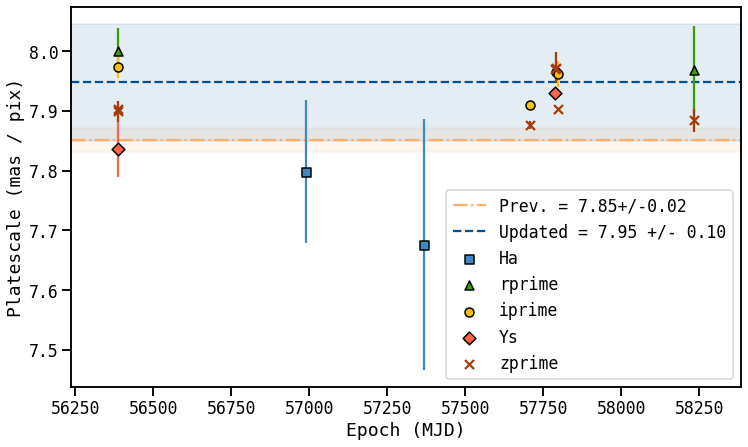

In [49]:
from astropy.time import Time
colors = ['#3F88C5','xkcd:grass green','xkcd:goldenrod','tomato','xkcd:rust']
markers = ['p','s','^','o','D','x']
c = 0
plt.figure(figsize=(12,7))
for wavel in filtdict.keys():
    filt = filtdict[wavel]
    clor = colors[c]
    filtname = filterlist[c]
    c += 1
    platescalelist = []
    platescalelisterr = []
    nights = []
    for night in filt.keys():
        expvals = expdict[night]
        vals = filt[night]
        sep = vals[0]
        seperr = vals[1]
        nights.append(night)
        platescale = expvals['sep']/sep
        platescalelist.append(platescale.to_list()[0])
        platescale_err = platescale*np.sqrt(((seperr/sep)**2)+((expvals['seperr']/expvals['sep'])**2))
        platescalelisterr.append(platescale_err.to_list()[0])
    print(nights)
    print(platescalelist)
    plt.errorbar(nights, platescalelist, yerr=platescalelisterr, color=clor, ecolor=clor, linestyle='', fmt='', alpha=1, zorder=2)
    plt.scatter(nights, platescalelist, color=clor, marker=markers[c], label=filtname, zorder=3, edgecolors='k')

x0, x1 = outtable['epoch'][0]-150, outtable['epoch'][8]+150
xar = np.array([x0,x1])
plt.fill_between(xar, np.zeros_like(xar)+7.8513-0.02, np.zeros_like(xar)+7.8513+0.02, color='#fdae6b', alpha=0.1, zorder=0)
plt.plot(xar, np.zeros_like(xar)+7.8513, label='Prev. = 7.85+/-0.02', linestyle='dashdot', color='#fdae6b', zorder=1)
newplatelabl = 'Updated = '+str(round(newplate,2))+' +/- '+str(round(newplate_err,2))+'0'
plt.fill_between(xar, np.zeros_like(xar)+newplate-newplate_err, np.zeros_like(xar)+newplate+newplate_err, color='#025194', alpha=0.1, zorder=0)
plt.plot(xar, np.zeros_like(xar)+newplate, label=newplatelabl, linestyle='dashed', color='#025194', zorder=1)
plt.legend(loc='lower right')
plt.xlim(x0, x1)
# plt.title('VisAO platescale')
plt.xlabel('Epoch (MJD)')
plt.ylabel('Platescale (mas / pix)')
plt.savefig('platescale_across epoch.pdf', dpi=300)

# minimize residuals to linear regression (outdated)

[[0.812      2.62425339 0.22886152]]


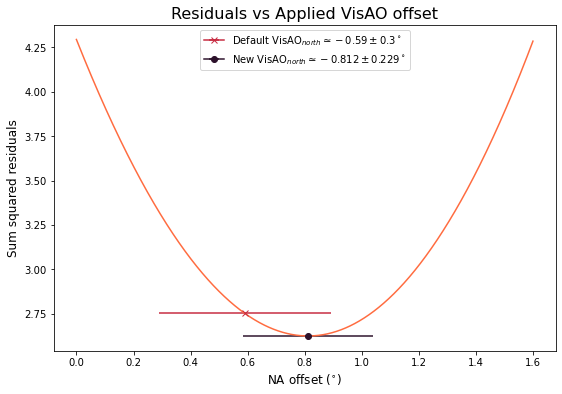

In [59]:
# 
# import numpy as np
# from scipy.odr import *
# # slope, intercept, r_value, p_value, std_err = stats.linregress(nircast['epoch'], nircast['pa'])
# residuals = []
# for i in np.arange(0, 1.6, 0.001):
#     visP_new = visP-i
#     kekP_orig = nircast['pa']
#     kekPe_orig = nircast['pa_err']
#     allP = np.append(visP_new, kekP_orig)
#     allerr = np.append(visPe, kekPe_orig)
#     allyr = np.append(epochs_yr, epochs_yr_nirc)
    
#     # linear regression accounting for errorbars on y
#     x = allyr
#     y = allP
#     y_err = allerr
    
#     # Define a function to fit the data with.
#     def lin_func(p, x):
#         m, b = p
#         return m*x + b

#     # Create a model for fitting.
#     lin_model = Model(lin_func)

#     # Create a RealData object using our initiated data from above.
#     data = RealData(x, y, sy=y_err)

#     # Set up ODR with the model and data.
#     odr = ODR(data, lin_model, beta0=[0., 1.])

#     # Run the regression.
#     out = odr.run()
    
#     x_fit = np.linspace(x.min(), x.max(), 1000)
#     y_fit = lin_func(out.beta, x_fit)
#     points_y_fit = lin_func(out.beta, epochs_yr)
#     visresid = visP_new-points_y_fit
#     from statsmodels.stats.weightstats import DescrStatsW
#     wstats = DescrStatsW(visresid, 1/visPe, ddof=0)
#     best_fit_err = wstats.std

#     # Use the in-built pprint method to give us results.
#     residuals.append((i, out.sum_square, best_fit_err))    
        
# pa_resid_arr = np.array(residuals)
# best_pa_off = pa_resid_arr[pa_resid_arr[:,1] == pa_resid_arr[:,1].min()]
# print(best_pa_off)
# orig_pa_off = pa_resid_arr[pa_resid_arr[:,0] == 0.59]
# plt.figure(figsize=(9,6))
# plt.plot(pa_resid_arr[:,0], pa_resid_arr[:,1], color='#ff6c40')
# plt.errorbar(orig_pa_off[:,0][0], orig_pa_off[:,1][0], xerr=visao_pa_default_err, marker='x', label='Default VisAO$_{north}\simeq-0.59\pm0.3^\circ$', color='#c72a40')
# newlabel = 'New VisAO$_{north}\simeq-'+str(best_pa_off[0][0])+'\pm'+str(round(best_pa_off[0][2],3))+'^\circ$'
# plt.errorbar(best_pa_off[:,0][0], best_pa_off[:,1][0], xerr=best_fit_err, marker='o', label=newlabel, color='#2c112b')
# plt.title('Residuals vs Applied VisAO offset')#, fontsize=22)
# plt.legend()
# plt.xlabel(r'NA offset ($^{\circ}$)')#, fontsize=18)
# plt.ylabel('Sum squared residuals')#, fontsize=18)
# plt.savefig('NAoff_resids.png', dpi=300)

# epoch to epoch offsets (outdated)

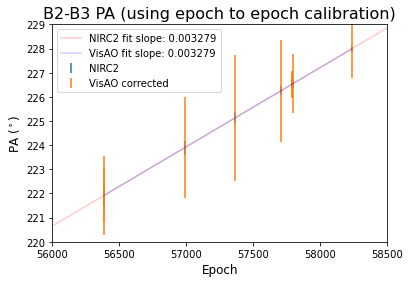

In [63]:
# compare using epoch to epoch offsets
nircast = pd.read_csv('B2-B3-orbitizetab.csv')

slope, intercept, r_value, p_value, std_err = stats.linregress(outtable['epoch'], kekP)
plt.errorbar(outtable['epoch'], kekP, yerr=kekPe, ls='none', label='NIRC2')
label = 'NIRC2 fit slope: '+str(round(slope,6))
plt.plot(nircast['epoch'], intercept + slope*nircast['epoch'], 'r', alpha=0.2, label=label)

slope, intercept, r_value, p_value, std_err = stats.linregress(outtable['epoch'], outtable['pa_expected'])
plt.errorbar(outtable['epoch'], outtable['pa_expected'], yerr=outtable['pa_err_expected'], ls='none', label='VisAO corrected')
label = 'VisAO fit slope: '+str(round(slope,6))
plt.plot(outtable['epoch'], intercept + slope*outtable['epoch'], 'b', alpha=0.2, label=label)

plt.legend()
plt.xlim(56000, 58500)
plt.ylim(220,229)
plt.title(r'B2-B3 PA (using epoch to epoch calibration)')
plt.xlabel('Epoch')
plt.ylabel(r'PA ($^\circ$)')
plt.savefig('visao_pa_compare_ep2ep.png', dpi=300)

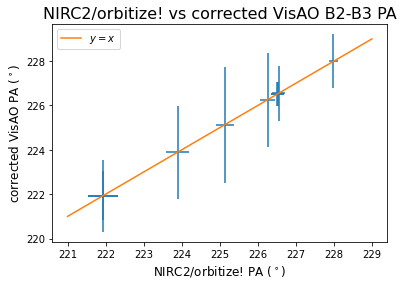

In [64]:
plt.errorbar(x=kekP, y=outtable['pa_expected'], xerr=kekPe, yerr=outtable['pa_err_expected'], ls='none')
plt.plot([221,229],[221,229], label=r'$y=x$')
plt.title('NIRC2/orbitize! vs corrected VisAO B2-B3 PA')
plt.legend()
plt.xlabel(r'NIRC2/orbitize! PA ($^\circ$)')
plt.ylabel(r'corrected VisAO PA ($^\circ$)')
plt.savefig('visao_pa_compare_corrected.png', dpi=300)